## COIN VALUE ESTIMATION USING IMAGE SEGMENTATION

   - [Final Goal](#goal)

   - [Process Flow](#process)

   - [Importing Libraries](#libraries)

   - [Circle Detection](#circle)

   - [Coin Classification](#classify)

   - [Displaying the result](#display)

<a id="goal"></a>
### PROJECT GOAL

In this project we'll look at how we can **read an image, identify the number of coins in that image** and classify the coins based on some parameters after which we'll **estimate the overall value of the coin**

Here's a sample image

<img alt="original image" src = "./coins/merged.jpg" width = 400 height = 400>


<a id="process"></a>
### PROCESS

We'll follow the following steps

> Import the necessary libraries.

> Detect the circle in the image, and draw the edge.

> Calculate the radius, based on the center of circle and its coordinates.

> Classify the coin value based on the radius and add text on the image.

> Finally we'll estimate the value of the coin.

<a id="libraries"></a>
### IMPORTING LIBRARIES

> ```import numpy``` for matrix operations.

> ```import cv2 | opencv_python``` primarily used for Image Segmentation. [Click here](https://analyticsindiamag.com/top-8-image-processing-libraries-in-python/) to see more such libraries

You can run ```pip install opencv-python | pip install numpy``` in your terminal or command prompt to install this libraries.

**Note:** The basic logic behind most of the image segmentation techniques is that, while reading an image the values of each image pixels is transformed into matrix having RGB values from 0-255. These individual pixels can be thought of as a single matrix and an image as a collection of those matrices.

A pixelated image of ```80*70``` pixels looks like this: <img src="./coins/pixelated.jpg">

If the image is read using ```cv2.imread()```, then the image can be thought of as a collection of ```[red, green, blue]``` (1\*3) matrix having 80 rows and 70 columns. 

Hence in most **Image Segmentation** technique, an image is converted to **gray scale** reducing it to two dimension.


In [21]:
import numpy as np
import cv2

'''Keeping the original file separately helps you to perform calc on the greyscale and show the results in the original one.'''
image = cv2.imread(r'c:/Users/PRANIT/Desktop/Online_Lessons/Python_Bootcamp/coins/6.jpg', cv2.IMREAD_GRAYSCALE)
original = cv2.imread(r'c:/Users/PRANIT/Desktop/Online_Lessons/Python_Bootcamp/coins/6.jpg', 1)

<a id="circle"></a>
### DETECTING CIRCLES USING HOUGH TRANSFORM 

There are many ways to detect circles in an image, one of the widely used ways is **Hough Transform.** Another methods include the following available in ```skimage library```

- Image Threshold
- Edge Based Segmentation
- Region Based Segmentation

To know more about the ```scikit image library```, [Click here](https://scikit-image.org/docs/stable/user_guide/getting_started.html)


**Hough Circle parameters**

- **image**: *Input image (grayscale)*
- **cv.HOUGH_GRADIENT**: *Circle detection method in openCV*
- **dp = 1**: *The inverse ratio of resolution*
- **minDist = 10**: *Minimum distance between detected centers*
- **circles**: *Stores all the circle detected*
- **param1 = 100**: *Upper threshold for the internal Canny edge detector*
- **param2 = 80**: *Threshold for center detection*
- **minRadius = 0**: *Minimum radio to be detected. If unknown, put zero as default*
- **maxRadius = 0**: *Maximum radius to be detected. If unknown, put zero as default*

**NOTE:** Play with the threshold values of the images to get the best results. You can see that the following combination of parameters work best with the images in ```./coins/```

In [22]:
'''Identifying the circles'''

# gaussian blur helps to soften the image.
image = cv2.GaussianBlur(image, (5, 5), 0)

# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=80, minRadius=0, maxRadius=0 ) #1
# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=69, minRadius=0, maxRadius=0 ) #2
# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=57, minRadius=0, maxRadius=0 ) #3
# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=63, minRadius=0, maxRadius=0 ) #4
# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=70, minRadius=0, maxRadius=0 ) #5
circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=80, minRadius=0, maxRadius=0 ) #6
# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=80, minRadius=0, maxRadius=0 ) #7
# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=97, minRadius=0, maxRadius=0 ) #8
# circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 10, param1=100, param2=88, minRadius=0, maxRadius=0 ) #9

<a id="classify"></a>
### COIN CLASSIFICATION

In this section we'll now set the values of coin depending on the circle parameters (**radius**).

> **NOTE:** The estimation is however not always correct, as the coin sizes are very similar. ```₹5``` is similar to the new ```₹2``` coin, newer ```₹2``` and older ```₹1``` are almost similar. Hence the if one wants a perfect program, one has to find diversity in coin sizes.

In [13]:
'''Finding the circle parameters'''
circles = np.uint16(np.around(circles))
for i in circles[0]:
    cv2.circle(original, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(original, (i[0], i[1]), 2, (0, 0, 255), 3)

    
'''Getting the circle radius based on the circle coordinates'''
def get_radius(circles):
    radius = []
    for each_coord in circles[0]:
        radius.append(each_coord[2])
    return radius
radii = get_radius(circles)


''' Setting the value of coin based on the radii'''
values = []
for i in radii:
    if i <= 36:
        values.append(1)
    elif i > 36 and i < 40:
        values.append(5)
    elif i >= 40:
        values.append(2)


<a id="display"></a>
### DISPLAYING THE ESTIMATED VALUE

In [16]:
'''Labelling the coins and adding informative texts.'''
cv2.putText(original, "Estimated coin value: " + str(sum(values)), (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,250,0), 2)

count = 0
for i in circles[0]:
    cv2.putText(original, str(values[count]), (i[0]+ 5, i[1] + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,250,0), 1)
    count += 1   
    
'''Creating a window to display.'''    
cv2.imshow("Detected Coins", original_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### BONUS PROGRAM | Region Adjacency Graph

Add any figure and see how the following program transforms the figure. Here's a [detailed read](https://vcansimplify.wordpress.com/2014/07/06/scikit-image-rag-introduction/).

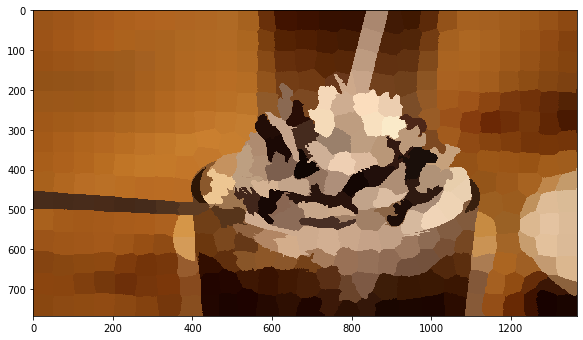

In [31]:
from skimage import graph, data, io, segmentation, color, data_dir
from matplotlib import pyplot as plt
from skimage.measure import regionprops
from skimage import draw
import numpy as np

def show_img(img):
    width = 10.0
    height = img.shape[0]*width/img.shape[1]
    f = plt.figure(figsize=(width, height))
    plt.imshow(img)
 
 
img = io.imread('.\coins\latte.jpg')

labels = segmentation.slic(img, compactness=30, n_segments=400)
labels = labels + 1
regions = regionprops(labels)

label_rgb = color.label2rgb(labels, img, kind='avg')
show_img(label_rgb)